# 0 - Bibliotecas

In [1]:
import random
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import seaborn as sns
from matplotlib import pyplot as plt
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from itertools import permutations as pmt
import plotly.figure_factory as ff
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# 1 -   A média pode não ser informativa
 A média aritmética é sensível à valores extremos, o que, no mundo real, pode "ajudar" à avaliações tendenciosas. O que me leva a um exemplo já de cara: Na ginástica artística os juízes não usam a média aritmética para classificar os atletas. Mas e aí, o que usar?

### Podemos usar:

- **MEDIANA** que pode ser mais representativa em conjuntos de dados assimétricos ou com muitos outliers (RobustScaler > StandardScaler)

- **MÉDIA APARADA**, que elimina os extremos, e  se calcula excluindo um número fixado de valores selecionados em cada ponta, e então tirando uma média dos valores restantes.

- **MEDIANA PONDERADA**: Em vez do número central, a mediana ponderada é um valor
cuja soma dos pesos de cada dado é igual para as metades superior e inferior da lista classificada.

### Exemplo:

> Digamos que queiramos observar os rendimentos familiares em bairros próximos a Lake Washington, em Seattle. Ao comparar o bairro Medina com o bairro Windermere, usando a média teríamos resultados muito diferentes, pois Bill Gates mora em Medina. Se usarmos a MEDIANA, não importa a fortuna de Bill Gates — a posição da observação central permanecerá a mesma.

## Conclusão:
- Para o exemplo da avaliação das ginastas, **a média aparada** pode ser uma boa prática (elimina 10% iniciais e finais e calcula a média). Ela é um meio termo entre média e mediana
- Em Python usamos o trim_mean, que vem da biblioteca Scipy, para calcular a média aparada



In [2]:
valores1 = [1, 1,1, 2, 3, 4, 4, 4, 5, 6, 7, 9]
valores2 = [1,4, 8, 12, 21, 29, 33, 43, 49, 53, 59, 63, 69, 70, 79, 90]
valores3 = [1, 1, 2, 3, 4, 6, 7, 8, 8, 9, 90]

# Média aparada
media_aparada = trim_mean(valores3, 0.1) # Remove 10% dos valores mais extremos
print(f"Média truncada {media_aparada}")

# Média tradicional
media = np.mean(valores3)
print(f"Média aritmética: {media}")

# Mediana
mediana = np.median(valores3)
print(f"Mediana: {mediana}")

Média truncada 5.333333333333333
Média aritmética: 12.636363636363637
Mediana: 6.0


In [4]:
notas = [8, 10, 8.1, 7.9, 7.1]

print(f"Média aparada: {trim_mean(notas,0.2)}")
print(f"Média aritmética: {np.mean(notas)}")
print(f"Mediana: {np.median(notas)}")


Média aparada: 8.0
Média aritmética: 8.22
Mediana: 8.0


# 2 -  Medidas de dispersão
- Funcionam em contextos diferentes de formas diferentes
- Trabalhar com desvios quadráticos é mais conveniente, matematicamente, do que com valores absolutos, em modelos estatísticos
- Desvio-padrão, desvio absoluto médio e variância NÃO SÃO ROBUSTOS FRENTE A OUTLIERS. Solução:  Desvio Absoluto Mediano da Mediana (MAD). Também é possível calcular um desvio-padrão aparado.
- Todas essas medidas de dispersão NÃO SÃO EQUIVALENTES: Desvio-Padrão > Desvio Absoluto Médio > Desvio Absoluto Mediano (SEMPRE)

## Conclusão:
- Métricas mais robustas para outliers incluem desvios absolutos médio e de mediana da média e percentis (quantis).


In [5]:
# Análise de distribuição e outliers com IQR:

valores = [1, 1, 4, 3, 5, 6, 7, 9]

df = pd.DataFrame(valores, columns=['values'])

# Calcular Q1 (25º percentil)
Q1 = df['values'].quantile(0.25)

# Calcular Q2 (50º percentil, que é a mediana)
Q2 = df['values'].quantile(0.50)

# Calcular Q3 (75º percentil)
Q3 = df['values'].quantile(0.75)


# Calcular o IQR
IQR = Q3 - Q1

lim_sup = Q3 + 1.5*IQR
lim_inf = Q1 - 1.5*IQR

print(f"Q1: {Q1}")
print(f"Q2 (mediana): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite Superior: {lim_sup}")
print(f"Limite inferior: {lim_inf}")

Q1: 2.5
Q2 (mediana): 4.5
Q3: 6.25
IQR: 3.75
Limite Superior: 11.875
Limite inferior: -3.125


<Axes: >

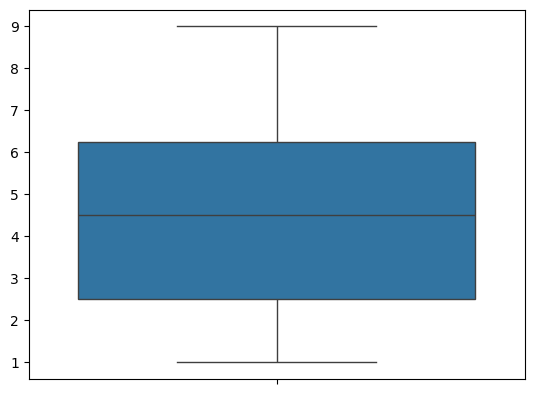

In [6]:
# Acima de 13: Outlier
# Abaixo de -3: Outlier
sns.boxplot(valores)

<Axes: >

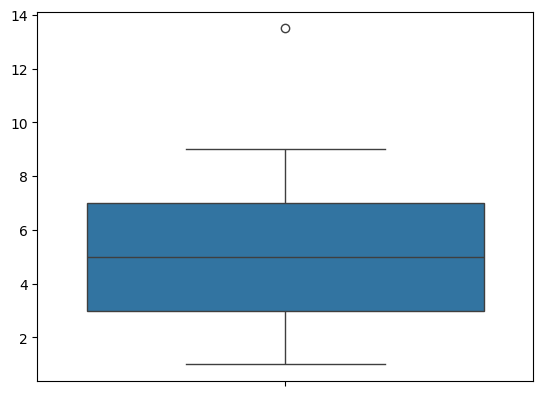

In [7]:
# Adicionando outliers
valores.append(13.5)
sns.boxplot(valores)

# 3 - Distribuição de dados

- Os percentis
também são valiosos para resumir toda a distribuição. É comum registrar os
quartis (25°, 50° e 75° percentis) e os decis (10°, 20°, …, 90° percentis)


- Percentis são especialmente valiosos para resumir as caudas (a amplitude
externa) da distribuição. A cultura popular cunhou o termo um por cento para
se referir às pessoas no 99° percentil superior de riqueza.

## Observações
#### **1 - A magnitude da diferença entre o 1° e o 99° percentil não é um indicativo da existência outliers, ou seja valores discrepantes.**
- Note abaixo que o "valores2" possui a maior diferença entre o 1° e 99° percentil, mas apenas "valores3" que possue outliers
- Ou seja, podemos ter valores separados por uma diferença enorme, mas, caso haja uma homogeneidade nesse conjunto em relação à separação dos valores, não haverá outliers.

In [8]:
valores1 = [1, 1, 4, 3, 5, 6, 7, 9, 10]
valores2 = [1,25, 50, 75, 100, 125, 150, 175, 200]
valores3 = [1, 1, 4, 3, 5, 6, 7, 9, 90]
print(f" Diferença entre o 99° e 1° percentil para valores 2: {np.percentile(valores1, 99) - np.percentile(valores1,1)}")
print(f" Diferença entre o 99° e 1° percentil para valores 2: {np.percentile(valores2, 99)- np.percentile(valores2,1)}")
print(f" Diferença entre o 99° e 1° percentil para valores 3: {np.percentile(valores3, 99) - np.percentile(valores3,1)}")


 Diferença entre o 99° e 1° percentil para valores 2: 8.92
 Diferença entre o 99° e 1° percentil para valores 2: 195.08
 Diferença entre o 99° e 1° percentil para valores 3: 82.52


## Boxplot
> Conseguiremos ver isso em boxplots, que representa uma visualização em formato de caixa, onde dentro dela estão 50% dos nossos dados. Essa região dentro da caixa é definida pela diferença entre o 3º quartil (Q3) e o 1º quartil (Q1).
- O boxplot contém 6 elementos, em ordem:
  - Limite inferior
  - Q1
  - Q2
  - Q3
  - Limite Superior
  - Outliers (antes do limite inferior ou limite superior)
- Entenda que, se o Q3, ou seja, a linha superior da caixa está sob o número 10, quer dizer que 75% dos valores estão abaixo de 10. Se a linha inferior da caixa (Q1) estiver projetando num valor de 4, quer dizer que 25% dos valores estão abaixo daquele valor, e assim por diante

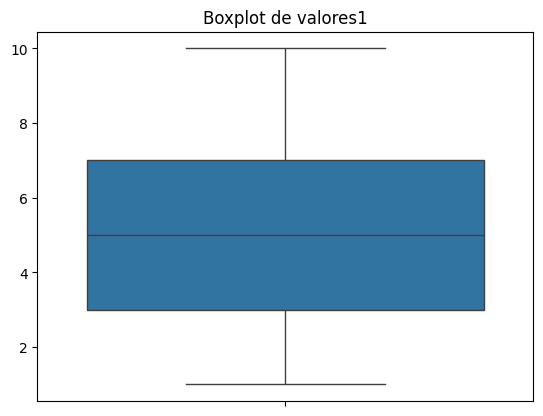

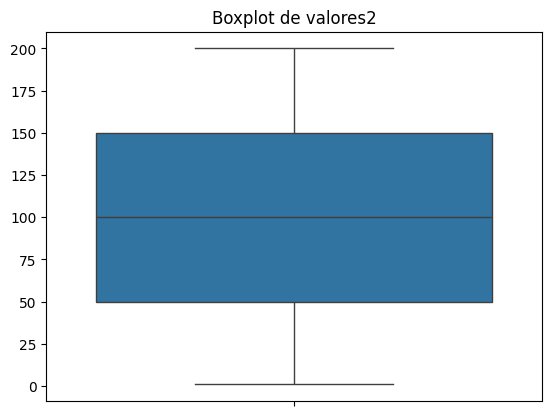

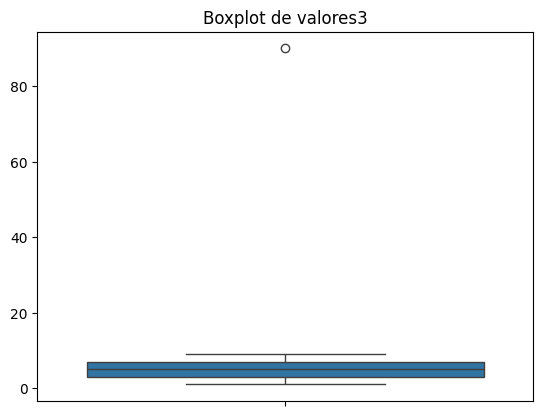

In [9]:
# Número de listas
num_listas = 3

# Criar boxplots para cada lista
for i in range(1, num_listas + 1):
    nome_lista = f'valores{i}'
    if nome_lista in globals():
        lista = globals()[nome_lista]
        sns.boxplot(data=lista)
        plt.title(f'Boxplot de {nome_lista}')
        plt.show()

# 4 - Valores categóricos
-  A Moda manda mais do que outras métricas
- Gráfico de barras e de pizza são tendências
  - Gráfico de barra parece um histograma, mas possui várias variáveis categóricas ao longo de x, e não apenas uma contínua, como no histograma
- "*A conversão de um dado numérico em dado categórico é um passo importante e muito usado na análise de dados, pois reduz a complexidade (e o tamanho) dos dados. Isso auxilia no descobrimento de relações entre características, particularmente nas etapas iniciais de uma análise.*" - Peter e Andrew Bruce
  - Em um modelo de ML, o contrário é válido. Transformar categóricos em numéricos é de suma importância, dessa vez para o entendimento da máquina.

### Valores esperados
É uma forma de média ponderada em que os pesos são as probabilidades de determinada categoria ou quantidade.

- Dados Nominais: Para variáveis categóricas nominais (sem ordem), o conceito de valor esperado não se aplica diretamente.
- Dados Ordinais: Para variáveis categóricas ordinais (com ordem), podemos atribuir valores numéricos às categorias e calcular o valor esperado como uma média ponderada.

#### Como funciona:
1. Multiplique cada resultado por sua probabilidade de ocorrer.
2. Some esses valores.

> Exemplo:
- Índice de satisfação de um serviço:

In [10]:

# Número de avaliações que queremos gerar
num_avaliacoes = 1000

# Lista para armazenar as avaliações
avaliacoes = []

# Gerar avaliações aleatórias
# random.seed(6)
for i in range(num_avaliacoes):
    avaliacao = random.randint(0, 5)
    avaliacoes.append(avaliacao)

# Calcular as porcentagens das avaliações
perc = [avaliacoes.count(i) / num_avaliacoes for i in range(6)]
# perc = [1/6 for i in range(6)]

val_esp = 0
for i,p in enumerate(perc):
  print(f"Nota {i} = {p*100}")
  val_esp = val_esp + p*i

print(f"Valor esperado: {val_esp}")



Nota 0 = 16.900000000000002
Nota 1 = 17.1
Nota 2 = 16.1
Nota 3 = 14.7
Nota 4 = 17.599999999999998
Nota 5 = 17.599999999999998
Valor esperado: 2.518


### Distribuição de Probabilidade e Gráfico

- Uma distribuição de probabilidade (como um histograma para dados discretos ou uma curva de densidade para dados contínuos) pode ajudar a visualizar onde os valores estão concentrados e, portanto, onde o valor esperado provavelmente se encontra.
- O valor esperado pode ser visualizado como o "centro de massa" da distribuição, o ponto onde a distribuição se equilibraria se fosse um objeto físico.
- Plotando o a distribuição de probabilidade com histplot (ou displot) e em seguida plotando um gráfico simples para comparar

<Axes: ylabel='Density'>

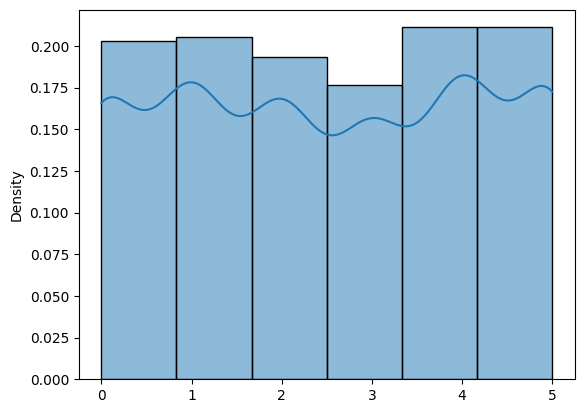

In [11]:
# Distribuição
sns.histplot(avaliacoes, kde=True, stat="density", bins=6)


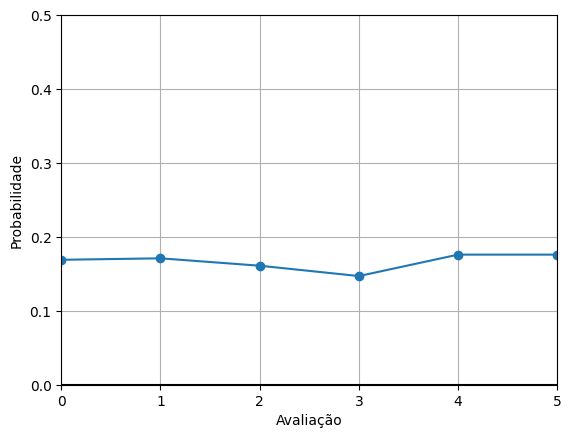

In [12]:
# Gráfico avaliações X probabilidade

plt.plot(range(0,6), perc, marker='o')
plt.xlabel('Avaliação')
plt.ylabel('Probabilidade')
plt.ylim(0,0.5) # Ajusta a escala em y
plt.xlim(0,5) # Ajusta a escala em x
plt.axhline(0, color='black')
plt.grid(True)
plt.show()


# 5 - Correlação
- Como muitos sabem, o coeficiente de correlação mede (entre -1 e 1) o quão relacionadas estão duas variáveis
- Antes de mais nada, vamos provar que duas variáveis visivelmente correlacionadas (ex: todos os valores de V1 iguais aos de V2) possuem o maior produto escalar possível, e nenhuma outra combinação de valores dentro dos dois vetores possui produto escalar maior que essa combinação perfeitamente correlacionada.
> Com a ideia de produto escalar entre os conjuntos de dados, podemos inferir que os conjuntos estão cada vez mais correlacionados conforme o produto escalar desses vetores (conjunto de dados) é o maior possível.
- Tenha em mente que, como a média e o desvio-padrão, o coeficiente de correlação é sensível aos outliers nos dados.

In [13]:
V1 = np.array([1,2,3]) # Variável 1
V2 = np.array([1,2,3]) # Variável 2
print("Produto Escalar de V1 e V2 (que estão perfeitamente correlacionados):", np.dot(V1,V2))
print("\n")

# Usando o permutations do pacote Itertools para pegar todas as combinações de dados
perm_V1 = list(pmt(V1))
perm_V1.remove((1,2,3))
perm_V2 = list(pmt(V2))
perm_V2.remove((1,2,3))

for i in range(len(perm_V1)):
  for j in range(len(perm_V2)):
    prod = np.dot(perm_V1[i],perm_V2[j])
    print(f"Produto Escalar de {perm_V1[i]} e {perm_V2[j]}: {prod}")

# Nenhum valor ultrapassa 14


Produto Escalar de V1 e V2 (que estão perfeitamente correlacionados): 14


Produto Escalar de (1, 3, 2) e (1, 3, 2): 14
Produto Escalar de (1, 3, 2) e (2, 1, 3): 11
Produto Escalar de (1, 3, 2) e (2, 3, 1): 13
Produto Escalar de (1, 3, 2) e (3, 1, 2): 10
Produto Escalar de (1, 3, 2) e (3, 2, 1): 11
Produto Escalar de (2, 1, 3) e (1, 3, 2): 11
Produto Escalar de (2, 1, 3) e (2, 1, 3): 14
Produto Escalar de (2, 1, 3) e (2, 3, 1): 10
Produto Escalar de (2, 1, 3) e (3, 1, 2): 13
Produto Escalar de (2, 1, 3) e (3, 2, 1): 11
Produto Escalar de (2, 3, 1) e (1, 3, 2): 13
Produto Escalar de (2, 3, 1) e (2, 1, 3): 10
Produto Escalar de (2, 3, 1) e (2, 3, 1): 14
Produto Escalar de (2, 3, 1) e (3, 1, 2): 11
Produto Escalar de (2, 3, 1) e (3, 2, 1): 13
Produto Escalar de (3, 1, 2) e (1, 3, 2): 10
Produto Escalar de (3, 1, 2) e (2, 1, 3): 13
Produto Escalar de (3, 1, 2) e (2, 3, 1): 11
Produto Escalar de (3, 1, 2) e (3, 1, 2): 14
Produto Escalar de (3, 1, 2) e (3, 2, 1): 13
Produto Escalar de (3, 2,

### Correlação de Pearson


> Mas há uma forma mais fácil e direta de fazer isso, o coeficiente de correlação, nesse caso, o de Pearson:

- Ideal para relações lineares
- Sensível a outliers

In [14]:
print(f"Coeficiente de Pearson: {pearsonr(V1,V2)[0]*100}%")

Coeficiente de Pearson: 99.99999999999997%


### Correlação de Spearman
- Baseado na classificação dos dados.
- Como trabalha com classificações, em vez de valores, essas
estimativas são robustas contra outliers e podem manipular certos tipos de não
linearidades.
- É criado uma espécie de ranking dos valores das variáveis, o que reduz a sensibilidade a outliers e padroniza o reconhecimento de relações, mesmo não lineares
- O apelo de estimativas baseadas em classificação é mais voltado a
conjuntos de dados menores e testes de hipóteses específicas.


> V3 é uma lista aleatória e V4 é o logaritmo de V3.

> Note que em Spearman, a correlação é perfeita, pois o coeficiente entende padrões não-lineares. Já Pearson calcula uma correlação forte, mas não entende que ela é "perfeita" pois só reconhece padrões lineares

In [15]:
V3 = [random.randint(1, 1000) for _ in range(100)]
V4 = []

for i in range(0,len(V3)):
  V4 = np.append(V4, np.log10(V3[i]))
V4 = V4.tolist()


print(f"Coeficiente de Spearman: {spearmanr(V3,V4)[0]*100}%")
print(f"Coeficiente de Pearson: {pearsonr(V3,V4)[0]*100}%")




Coeficiente de Spearman: 99.99999999999999%
Coeficiente de Pearson: 90.75354154594406%


## Diagramas de Dispersão
- Ideal para demonstrar a relação entre duas variáveis
- Podemos usar:
  - Matplotlib: plt.scatter()
  - Seaborn: sns.scatterplot()
  - Plotly: px.scatter()
  - Bokeh: p.scatter()

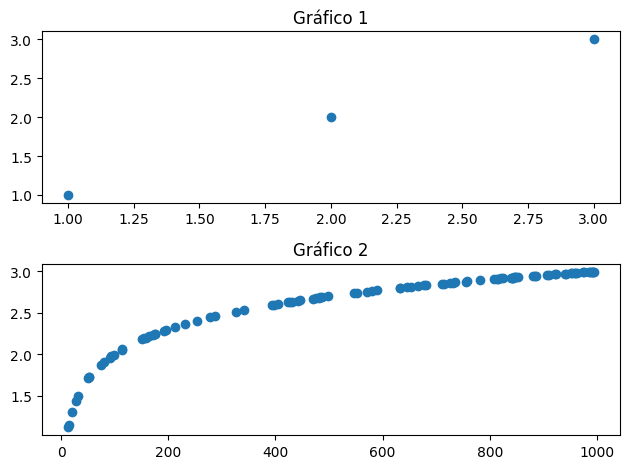

In [16]:
fig, axs = plt.subplots(2, 1)

axs[0].scatter(V1, V2)
axs[0].set_title('Gráfico 1')

axs[1].scatter(V3, V4)
axs[1].set_title('Gráfico 2')

plt.tight_layout()

plt.show()



# 6 - Explorando Duas ou Mais Variáveis
- O gráfico de dispersão é bem informativa p/ um conjunto relativamente pequeno de dados, na casa dos 500, 1000.
- Para valores na casa dos milhares e milhões, é necessário algumas outras formas de compactar a visualização e ainda assim ser informativo

In [17]:
V5 = np.linspace(0, 10, 10000)
V6 = np.random.normal(0, 10, 10000)

## Diagrama de Dispersão

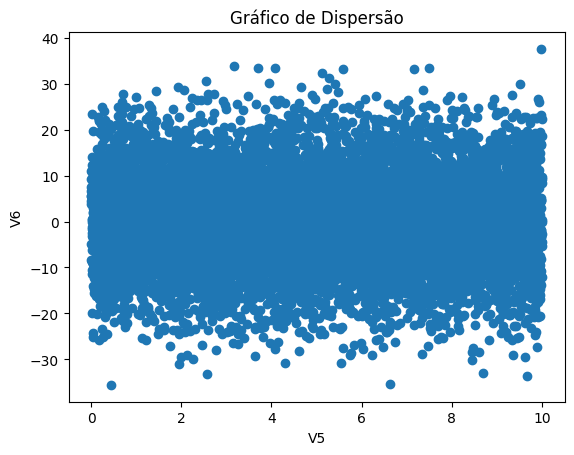

In [18]:
# Usando Diagrama de Dispersão
plt.scatter(V5, V6)
plt.xlabel('V5')
plt.ylabel('V6')
plt.title('Gráfico de Dispersão')
plt.show()

## Compartimentação Hexagonal

### Compartimentação Hexagonal (Matplotlib)

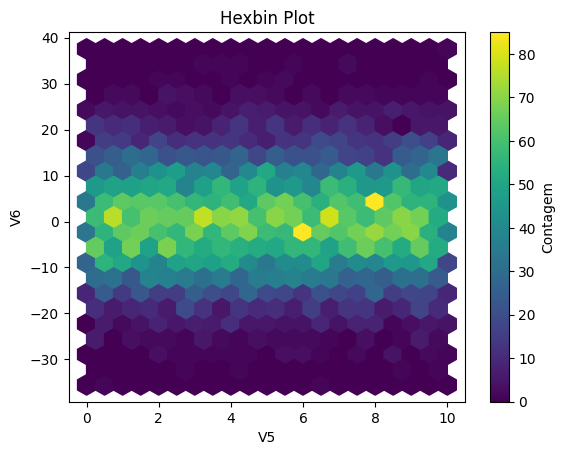

In [19]:
# Usando compartimentalização hexagonal com matplotlib
plt.hexbin(V5, V6, gridsize=20, cmap='viridis')
plt.xlabel('V5')
plt.ylabel('V6')
plt.colorbar(label='Contagem')
plt.title('Hexbin Plot')
plt.show()

### Compartimentação Hexagonal (plotly.express)

In [20]:
# Criar o gráfico hexagonal
fig = px.density_heatmap(x=V5, y=V6, nbinsx=10, nbinsy=10, histfunc='count', color_continuous_scale='Viridis', facet_col_spacing=0.5)

# Mostrar o gráfico
fig.show()

### Compartimentação Hexagonal para latitudes e longitudes (plotly.ff)

In [21]:
# DataFrame pra simulação (casas em uma região)
df = pd.read_csv('kc_house_data.csv')
df = df.drop('date', axis = 1)

## Resumindo, eu coloquei um filtro por preços das casas, ou seja, quanto mais amarelo, mais caro. Quanto menos amarelo, mais barato

fig = ff.create_hexbin_mapbox(data_frame = df, lat = df['lat'], lon = df['long'],
                              mapbox_style='carto-positron',
                              color_continuous_scale = 'Inferno',
                              min_count = 1,
                              color = df['price'],
                              labels = {"color": "Preço"},
                              show_original_data = False,
                              # original_data_marker = dict(size=10, color = 'blue', opacity = 0.006),
                              zoom = 8,
                              nx_hexagon=10)
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'kc_house_data.csv'

### Mapa de calor
- Podemos fazer um mapa de calor, semelhante à compartimentação por hexagonos, só que agora usamos quadrados.
- E em nosso caso, iremos colorir de acordo com as variáveis mais correlacionadas do DataFrame de exemplo.

In [ ]:
# Criando Dataset de exemplo
dataset = pd.DataFrame([('Nicolas Miqueias',1, 5000, 23, 2, 0),
                        ('Yana Dhara', 2, 4580, 25, 3, 1),
                       ('Cleiton Araújo', 2, 6000, 25, 6, 0),
                       ('Artur Martins', 3, 6000, 34, 10, 0),
                       ('Ernani Sousa', 4, 12000, 44, 4, 0),
                       ('Eduardo Gomes',5, 18000, 45, 5, 0),
                       ('Guilherme Ted',6, 15000, 28, 4, 0),
                       ('Júlio Santos',7,20000, 34, 10, 0),
                       ('Larissa Santos',8, 9000, 29, 4, 1),
                       ('Lia Souza',9,18000, 45, 20, 1),
                       ('Rafael Peres',10,30000, 39, 11, 0),
                       ('Luis Santos', 5, 14000, 25, 3, 0),
                       ('Nayara Azevedo', 8, 13000, 29, 4, 1)],
                      columns=('Name', 'Level', 'Payment', 'Age', 'Company Time', 'Gender'))
dataset

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.drop('Name', axis = 1).corr(), annot = True, cmap = 'crest')
plt.show()

### Tabelas de Contingência
- Fundamental para relacionar duas variáveis categóricas
- Ele mostra basicamente as contagens das intersecções entre as variáveis categóricas, com o pd.crosstab
- Um exemplo claro, se adicionarmos duas colunas categóricas ao nosso dataset, é o de quantificar pessoas de determinado departamento por região geográfica
- Note que o crosstab é diferente do groupby, também do Pandas.
  - Quando se analisa a relação entre duas ou mais variáveis categóricas, ou criar tabelas de frequência: **Tabela de contingências**
  - Quando se quer aplicar cálculos de agregação (soma, média, contagem, etc.) aos grupos formados com base em uma ou mais colunas: **GroupBy**

In [ ]:
# Usando o DataFrame anterior, adicionando as colunas 'Region' e 'Department'
reg = ['North', 'West','South', 'East']
dep = ['IT', 'Adm', 'Finances', 'Marketing']
dataset['Region'] = None
dataset['Department'] = None

# Randomizando o processo
for i in range(len(dataset)):
  dataset['Region'][i] = random.choice(reg)
  dataset['Department'][i] = random.choice(dep)

dataset

#### Visualização em DataFrame
> Note que a visualização não ficou perfeita, já que os índices estão um pouco desorganizados

In [ ]:
tab_cont = pd.crosstab(dataset['Region'], dataset['Department'])
tab_cont

#### Visualização com heatmap
> Agora, com cores, fica mais informativo:

In [ ]:
sns.heatmap(tab_cont, annot=True, cmap='crest')

## Variáveis numéricas e categóricas
> Há algumas formas de mostrar a relação entre variáveis categóricas e numéricas, como boxplots, gráficos de dispersão multiníveis, gráfico de barras, etc...

### Gráfico de Dispersão e Regressão Multinível
> Comparativo entre salário e idade, filtrando por gênero.

In [ ]:
for i in range(len(dataset)):
  if dataset['Gender'][i] == 0:
    dataset['Gender'][i] = 'Homem'
  else:
      dataset['Gender'][i] = 'Mulher'

dataset

In [ ]:
sns.scatterplot(x='Age', y='Payment', hue='Gender', data=dataset)

In [ ]:
# Bonûs: Regressão multinível

sns.lmplot(x='Age', y='Payment', hue='Gender', data=dataset)
plt.show()

### Boxplots
> Filtrando salário X gênero

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(x='Gender', y='Payment', data=dataset, ax=ax)
ax.set_xticklabels(['Homem', 'Mulher'])
ax.set_ylabel('Payment')
ax.set_ylim(0, 30000)
plt.show()


### Gráfico de barras
> Mais visual e de fácil compreensão para relacionar a relação categórica/numérica.
- Ainda pode ser usado o filtro "hue" que usamos para a regressão multinível, adicionando um condicionante para filtragem. No caso, utilizei novamente o filtro por gênero

In [ ]:
fig, ax = plt.subplots()

sns.barplot(x='Region', y='Payment', hue='Gender', data=dataset, ax=ax)
ax.set_ylabel('Payment')
ax.set_ylim(0, 30000)
plt.show()



In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 9))

axs[0].bar(dataset['Region'], dataset['Payment'])
axs[0].set_title('Pagamentos por região')

sns.barplot(x='Region', y='Payment', hue='Gender', data=dataset, ax=axs[1])
axs[1].set_title('Pagamentos por região e Gênero')
axs[1].set_ylabel('Payment')
plt.show()
